In [112]:
# simulator
from qiskit import Aer, assemble

from qiskit.circuit import QuantumCircuit
from qiskit.extensions import (XGate, YGate, ZGate, HGate, SGate, SdgGate, CXGate,
                               CYGate, CZGate, SwapGate, U3Gate)

from qiskit.visualization import plot_state_qsphere


import numpy as np

def random_classical_circuit(num_qubits, depth, seed=None):  # pylint:disable=unused-argument

    one_q_ops = [XGate]
    two_q_ops = [CXGate, SwapGate]

    if seed is None:
        seed = np.random.randint(0, np.iinfo(np.int32).max)
    rng = np.random.RandomState(seed)
    qc = QuantumCircuit(num_qubits,num_qubits)
    # apply arbitrary random operations at every depth
    for p in range(depth):
        qc.snapshot('test'+str(p))
        remaining_qubits = list(range(num_qubits))
        while remaining_qubits:
            max_possible_operands = min(len(remaining_qubits), 2)
            num_operands = rng.choice(range(max_possible_operands)) + 1
            rng.shuffle(remaining_qubits)
            operands = remaining_qubits[:num_operands]
            remaining_qubits = [q for q in remaining_qubits if q not in operands]
            if num_operands == 1:
                operation = rng.choice(one_q_ops)
            elif num_operands == 2:
                operation = rng.choice(two_q_ops)
            register_operands = [i for i in operands]
            op = operation()

            qc.append(op, qargs=register_operands, cargs=None)
    qc.barrier(range(num_qubits))
    qc.measure(range(num_qubits), range(num_qubits))

    return qc

def random_stablizer_circuit(num_qubits, depth, seed=None):  # pylint:disable=unused-argument

    one_q_ops = [XGate, YGate, ZGate, HGate, SGate, SdgGate]
    two_q_ops = [CXGate, CYGate,  CZGate, SwapGate]

    if seed is None:
        seed = np.random.randint(0, np.iinfo(np.int32).max)
    rng = np.random.RandomState(seed)
    qc = QuantumCircuit(num_qubits,num_qubits)
    # apply arbitrary random operations at every depth
    qc.h(range(num_qubits))
    qc.snapshot('test'+str(0))
    for p in range(depth):
        qc.snapshot('test'+str(p+1))
        remaining_qubits = list(range(num_qubits))
        while remaining_qubits:
            max_possible_operands = min(len(remaining_qubits), 2)
            num_operands = rng.choice(range(max_possible_operands)) + 1
            rng.shuffle(remaining_qubits)
            operands = remaining_qubits[:num_operands]
            remaining_qubits = [q for q in remaining_qubits if q not in operands]
            if num_operands == 1:
                operation = rng.choice(one_q_ops)
            elif num_operands == 2:
                operation = rng.choice(two_q_ops)
            register_operands = [i for i in operands]
            op = operation()

            qc.append(op, qargs=register_operands, cargs=None)
    qc.barrier(range(num_qubits))
    qc.measure(range(num_qubits), range(num_qubits))

    return qc

def random_quantum_circuit(num_qubits, depth, seed=None):  # pylint:disable=unused-argument

    one_q_ops = [U3Gate]
    two_q_ops = [CXGate, CYGate,  CZGate, SwapGate]

    if seed is None:
        seed = np.random.randint(0, np.iinfo(np.int32).max)
    rng = np.random.RandomState(seed)
    qc = QuantumCircuit(num_qubits,num_qubits)
    # apply arbitrary random operations at every depth
    qc.h(range(num_qubits))
    qc.snapshot('test'+str(0))
    for p in range(depth):
        qc.snapshot('test'+str(p+1))
        remaining_qubits = list(range(num_qubits))
        while remaining_qubits:
            max_possible_operands = min(len(remaining_qubits), 2)
            num_operands = rng.choice(range(max_possible_operands)) + 1
            rng.shuffle(remaining_qubits)
            operands = remaining_qubits[:num_operands]
            remaining_qubits = [q for q in remaining_qubits if q not in operands]
            if num_operands == 1:
                operation = rng.choice(one_q_ops)
                angles = [rng.uniform(0, 2 * np.pi) for x in range(3)]
                op = operation(*angles)
            elif num_operands == 2:
                operation = rng.choice(two_q_ops)
                op = operation()
            register_operands = [i for i in operands]
            qc.append(op, qargs=register_operands, cargs=None)
    qc.barrier(range(num_qubits))
    qc.measure(range(num_qubits), range(num_qubits))

    return qc

The first example is a random classical circuit.  

- X is a  gate the takes 0-> 1

- CX (plus) is a gate the flips the target if control is in one

- Swap is a gate that swaps classical bits

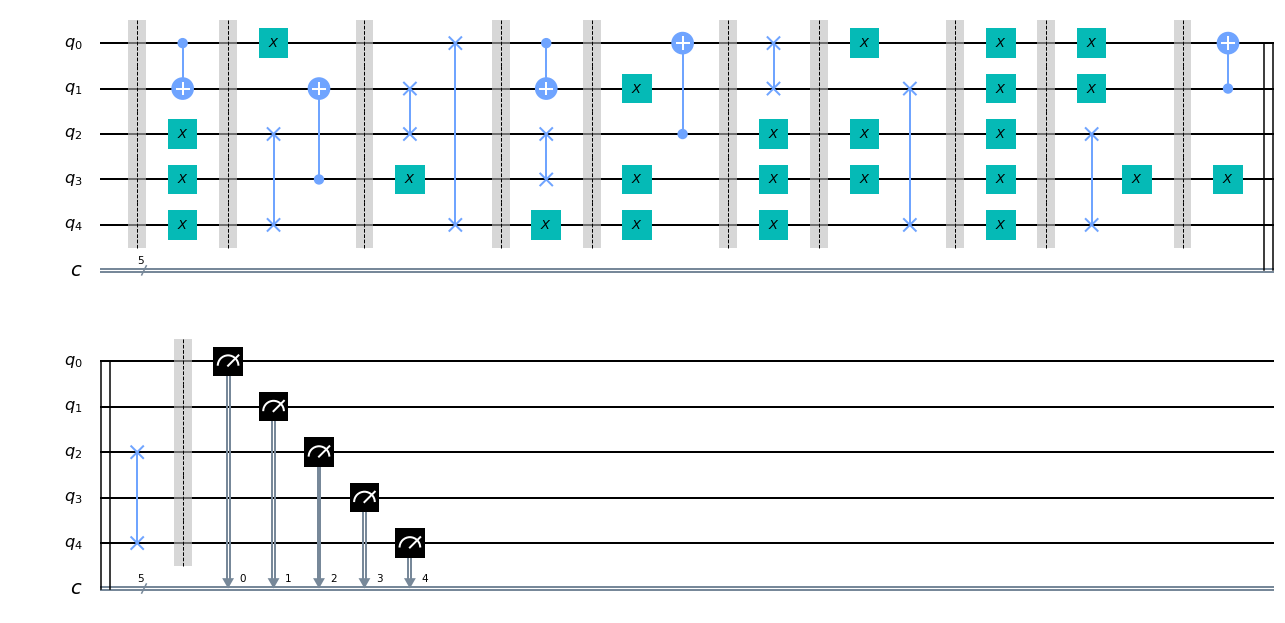

In [409]:
classical = random_classical_circuit(5, 10, 0)
classical.draw(output='mpl')

In [410]:
sim = Aer.get_backend('statevector_simulator')
ans = sim.run(assemble(classical)).result().data(0)
states = []
for p in range(10):
    states.append(ans['snapshots']['statevector']['test'+str(p)][0])

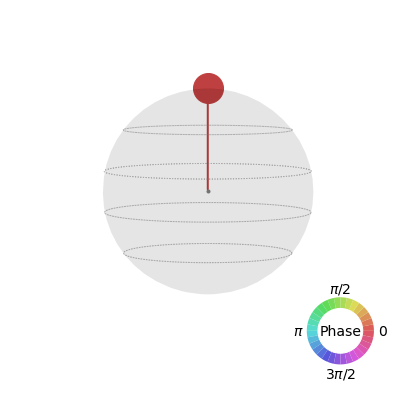

In [411]:
plot_state_qsphere(states[0])

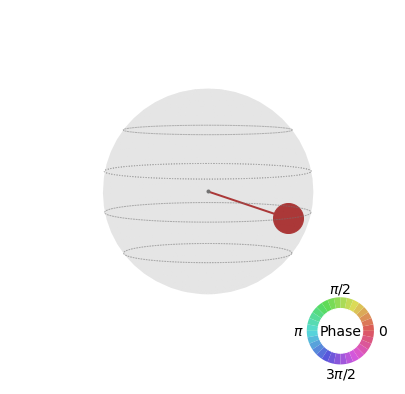

In [412]:
plot_state_qsphere(states[1])

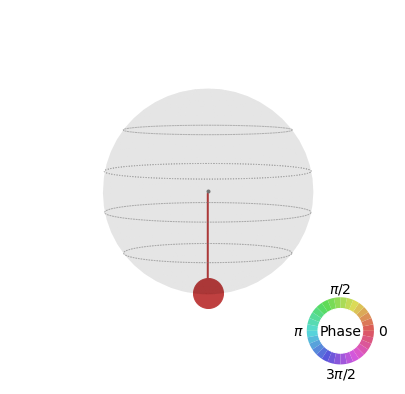

In [413]:
plot_state_qsphere(states[2])

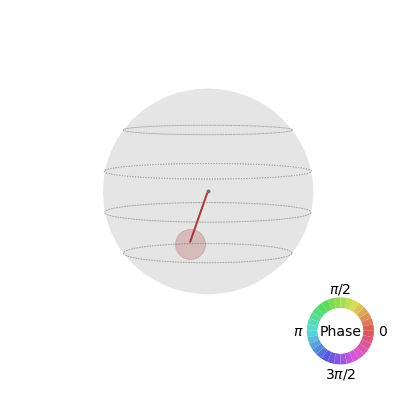

In [414]:
plot_state_qsphere(states[3])

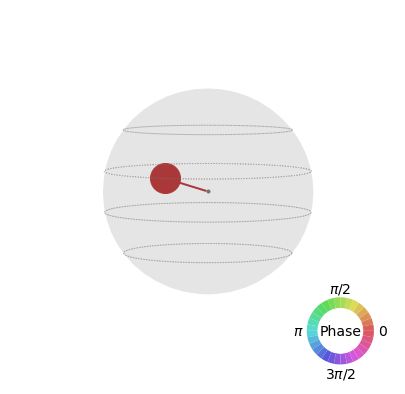

In [415]:
plot_state_qsphere(states[4])

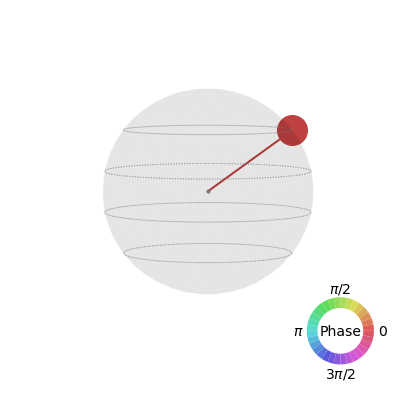

In [416]:
plot_state_qsphere(states[9])

# Random clifford 

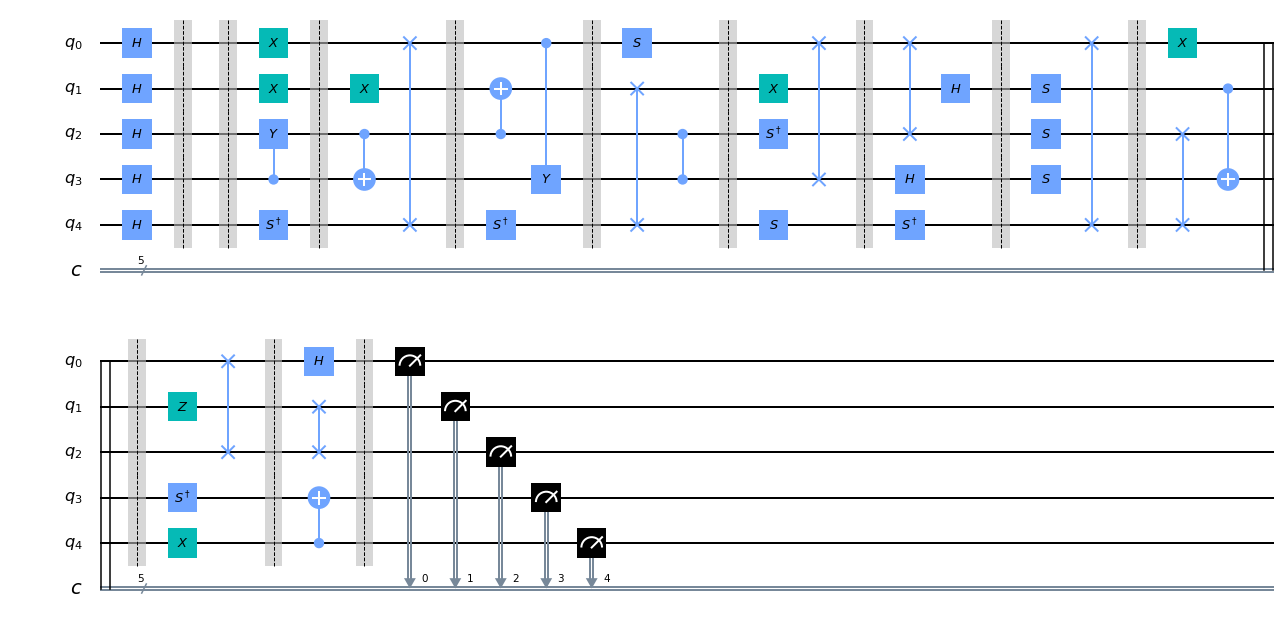

In [138]:
stablizer = random_stablizer_circuit(5, 10, 0)
stablizer.draw(output='mpl')

In [139]:
sim = Aer.get_backend('statevector_simulator')
ans = sim.run(assemble(stablizer)).result().data(0)
states = []
for p in range(10):
    states.append(ans['snapshots']['statevector']['test'+str(p)][0])

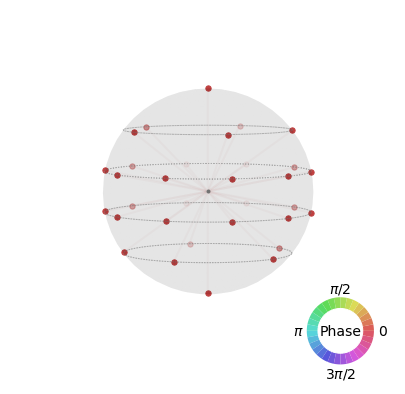

In [140]:
plot_state_qsphere(states[0])

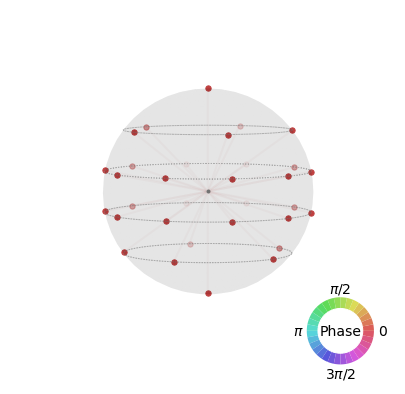

In [141]:
plot_state_qsphere(states[1])

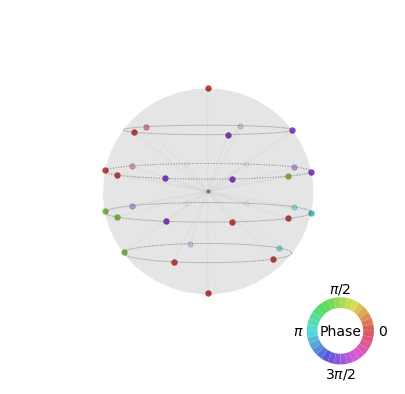

In [142]:
plot_state_qsphere(states[2])

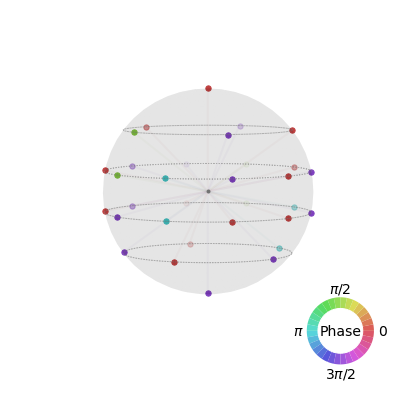

In [143]:
plot_state_qsphere(states[3])

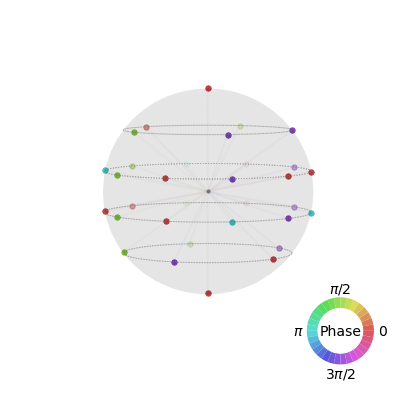

In [144]:
plot_state_qsphere(states[4])

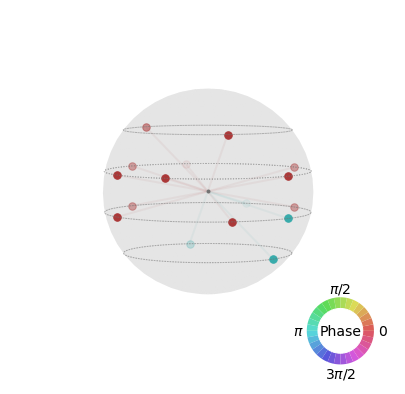

In [146]:
plot_state_qsphere(states[9])

# Random Hard 

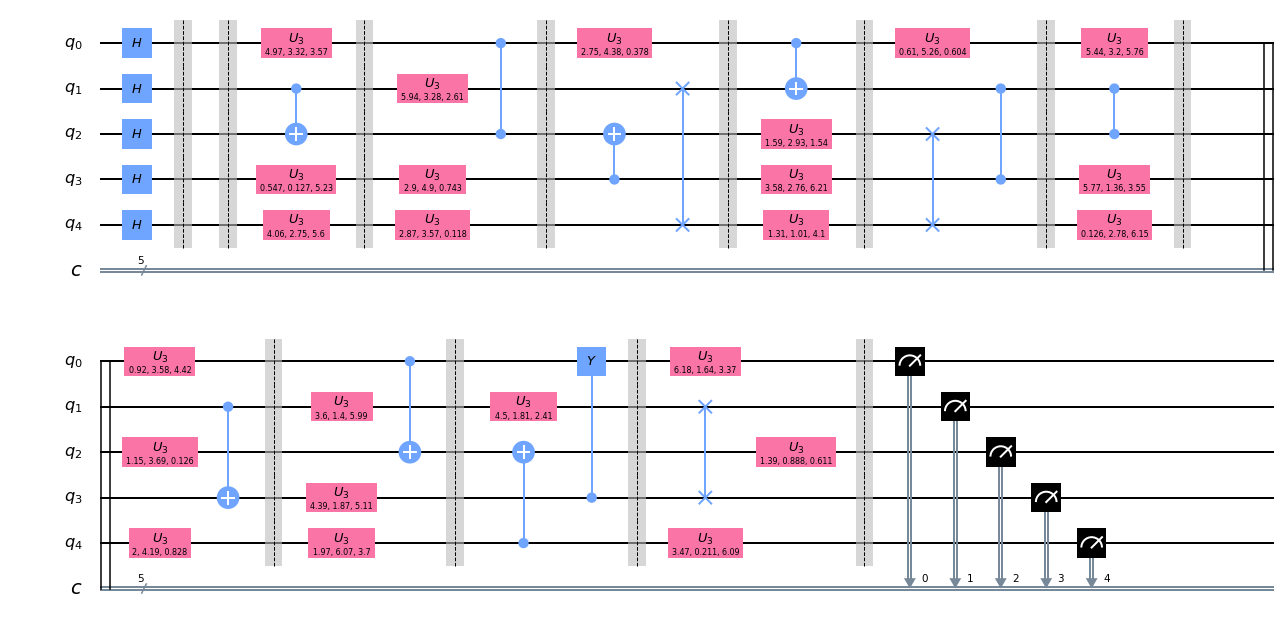

In [147]:
quantum = random_quantum_circuit(5, 10, 0)
quantum.draw(output='mpl')

In [148]:
sim = Aer.get_backend('statevector_simulator')
ans = sim.run(assemble(quantum)).result().data(0)
states = []
for p in range(10):
    states.append(ans['snapshots']['statevector']['test'+str(p)][0])

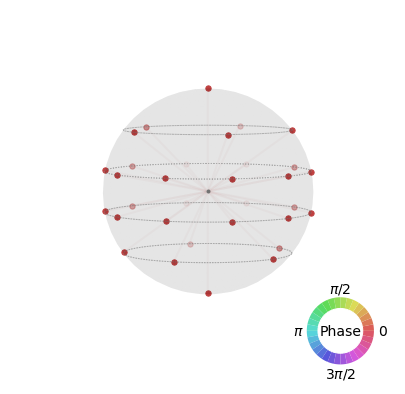

In [149]:
plot_state_qsphere(states[0])

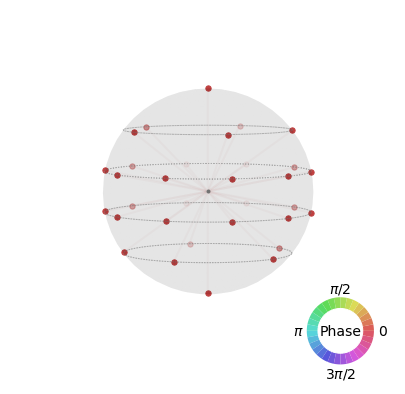

In [150]:
plot_state_qsphere(states[1])

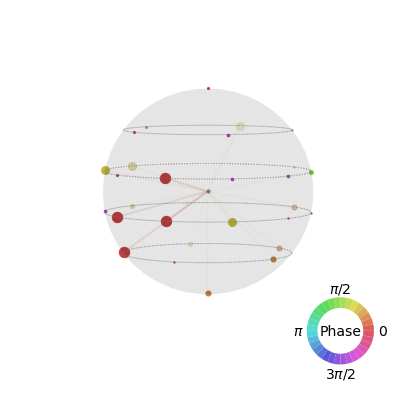

In [151]:
plot_state_qsphere(states[2])

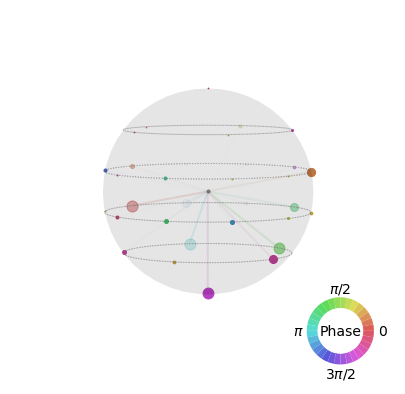

In [152]:
plot_state_qsphere(states[3])

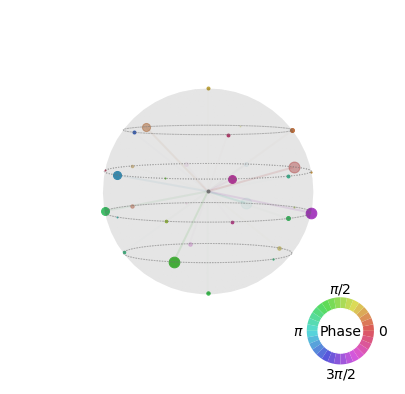

In [153]:
plot_state_qsphere(states[4])

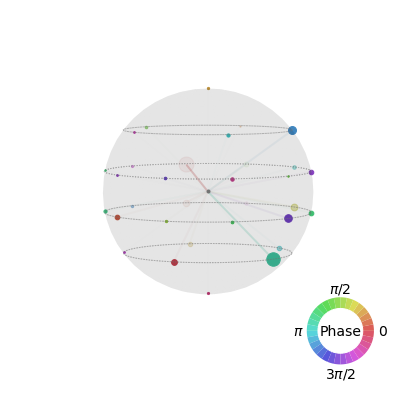

In [155]:
plot_state_qsphere(states[9])

# Grover Alg on 5 qubuts

In [395]:

n = 5
encode = '11111'
steps = 4

encode_state = np.ones(1 << 5, dtype=complex)
m = int(encode, 2)
encode_state[m] = -1
encode_state


reflect = np.ones(1 << 5, dtype=complex)
r = int('00000', 2)
reflect[r] = -1
reflect

grover_circuit = QuantumCircuit(n)

counter = 0 
grover_circuit.snapshot('test'+str(counter))
#superpostion
grover_circuit.h(range(n))
counter=counter+1
grover_circuit.snapshot('test'+str(counter))

#amp
for p in range(steps):
    grover_circuit.diagonal(encode_state.tolist(),[0,1,2,3,4])
    counter=counter+1
    grover_circuit.snapshot('test'+str(counter))

    #reflect
    grover_circuit.h(range(n))
    grover_circuit.diagonal(reflect.tolist(),[0,1,2,3,4])
    grover_circuit.h(range(n))
    grover_circuit.draw(output='mpl')
    counter=counter+1
    grover_circuit.snapshot('test'+str(counter))


counter

9

In [396]:
m

31

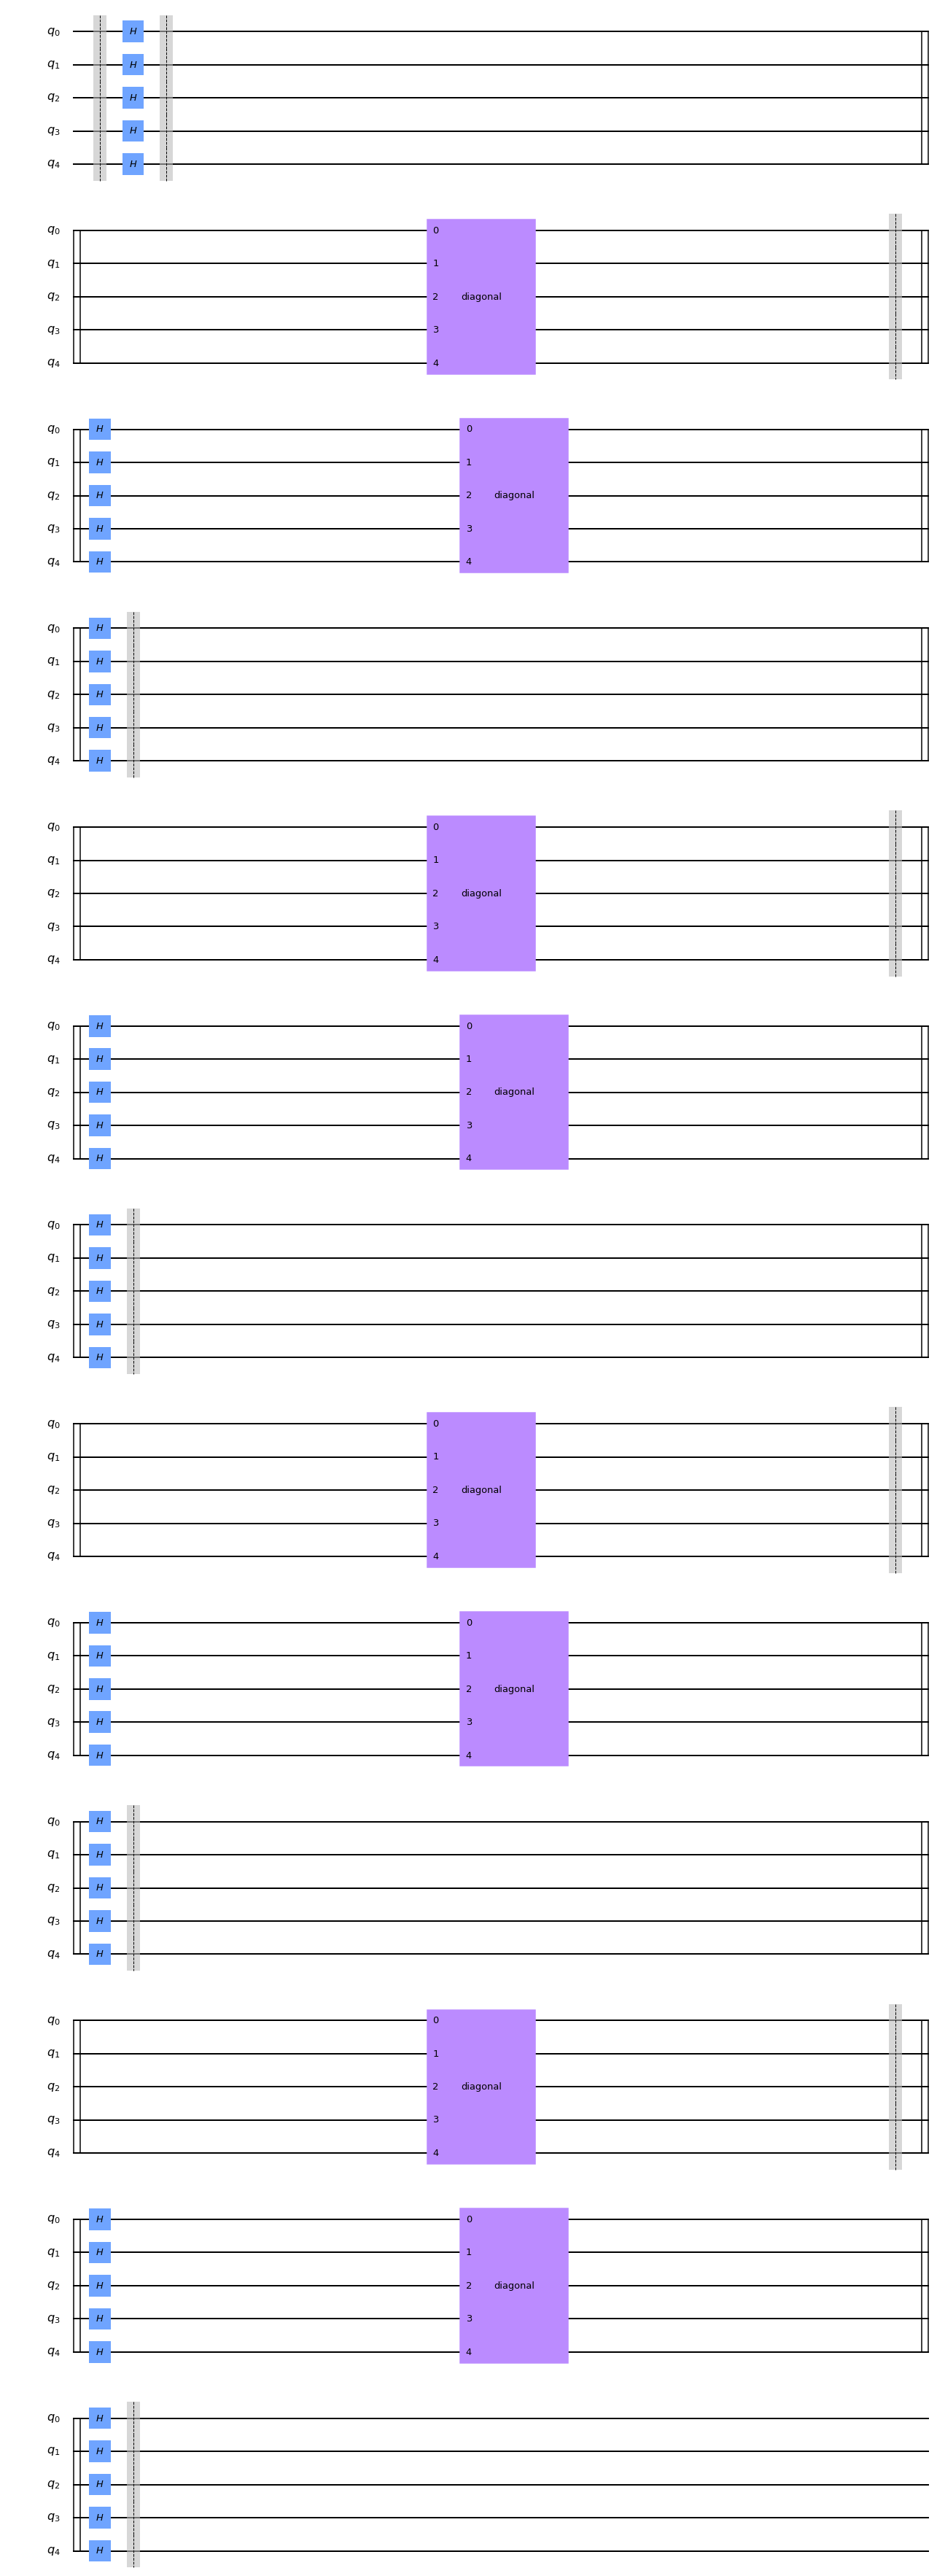

In [397]:
grover_circuit.draw(output="mpl")

In [398]:
sim = Aer.get_backend('statevector_simulator')
ans = sim.run(assemble(grover_circuit)).result().data(0)
states = []
for p in range(counter+1):
    states.append(ans['snapshots']['statevector']['test'+str(p)][0])

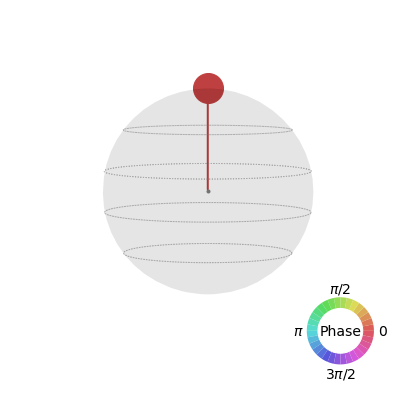

In [399]:
#all in the ground 
plot_state_qsphere(states[0])

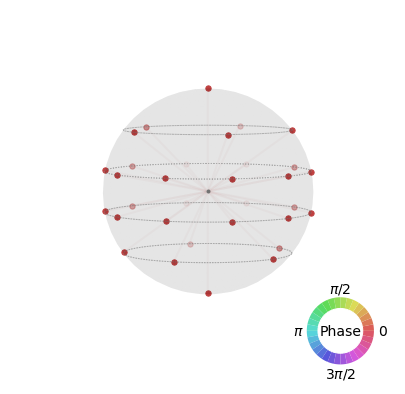

In [400]:
#make superposition
plot_state_qsphere(states[1])

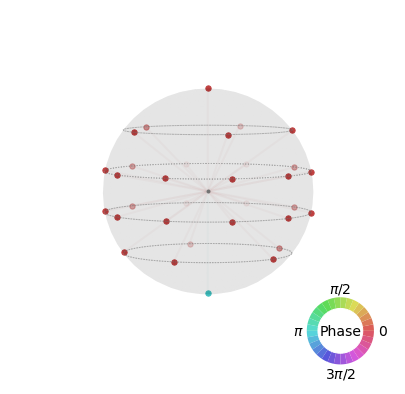

In [401]:
#encode
plot_state_qsphere(states[2])

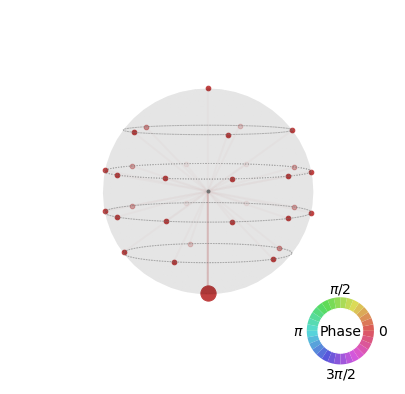

In [402]:
#reflect once
plot_state_qsphere(states[3])

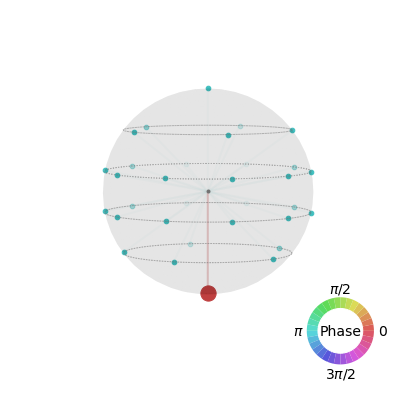

In [403]:
# encode twice
plot_state_qsphere(states[4])

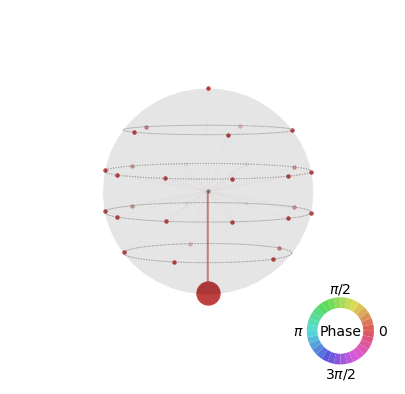

In [404]:
# reflect twice
plot_state_qsphere(states[5])

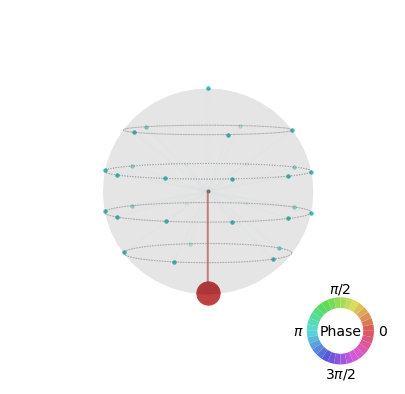

In [405]:
# ecode three
plot_state_qsphere(states[6])

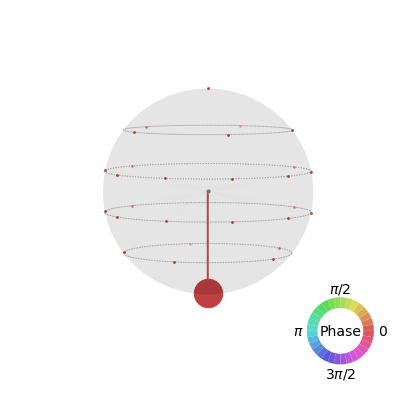

In [406]:
# reflect three
plot_state_qsphere(states[7])

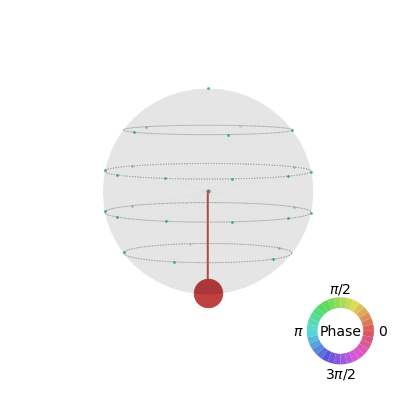

In [407]:
# reflect four
plot_state_qsphere(states[8])

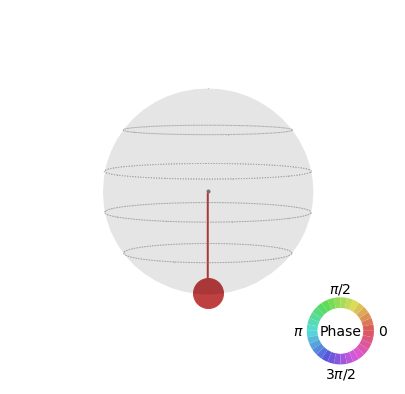

In [408]:
# reflect four
plot_state_qsphere(states[9])